### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2, f_classif

### Importing the data

In [4]:
churn = pd.read_csv("churn.csv")

In [5]:
df = churn.copy()

### Understanding the data

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum() #no null values in the database

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.shape

(7043, 21)

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [14]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Data Manipulation

In [30]:
le = LabelEncoder()

In [31]:
df_dummy = ['gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [32]:
for i in df_dummy:
    df[i] = le.fit_transform(df[i])
    

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [34]:
df.Churn = df.Churn.astype('int32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [36]:
count = 0
for i in df.TotalCharges:
    if i == ' ':
        count = count+1
print(count)

11


In [37]:
max(df.TotalCharges)

'999.9'

In [38]:
df.TotalCharges = df.TotalCharges.replace(' ',max(df.TotalCharges))

In [39]:
df.TotalCharges = df.TotalCharges.astype('float64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [41]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.295982,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.567266,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### Data Visualization

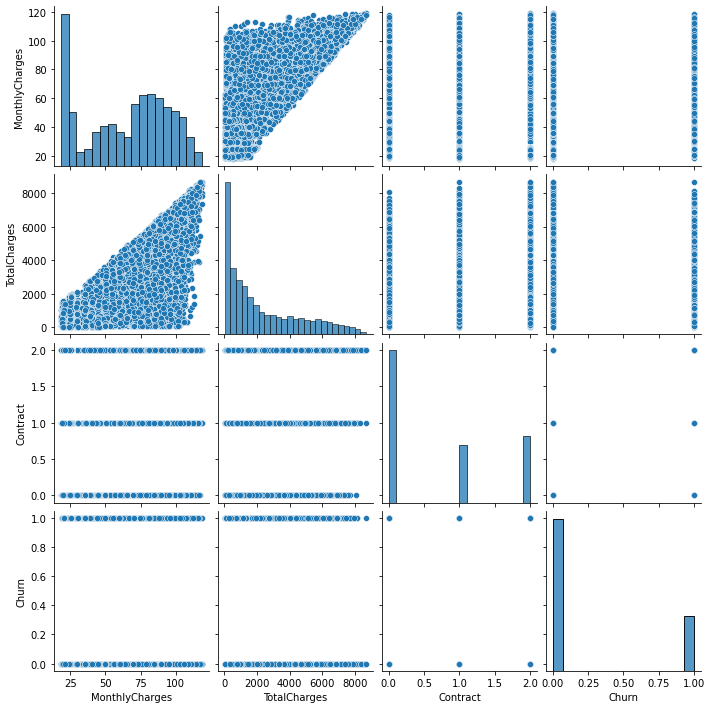

In [42]:
sns.pairplot(df[["MonthlyCharges","TotalCharges","Contract","Churn"]])

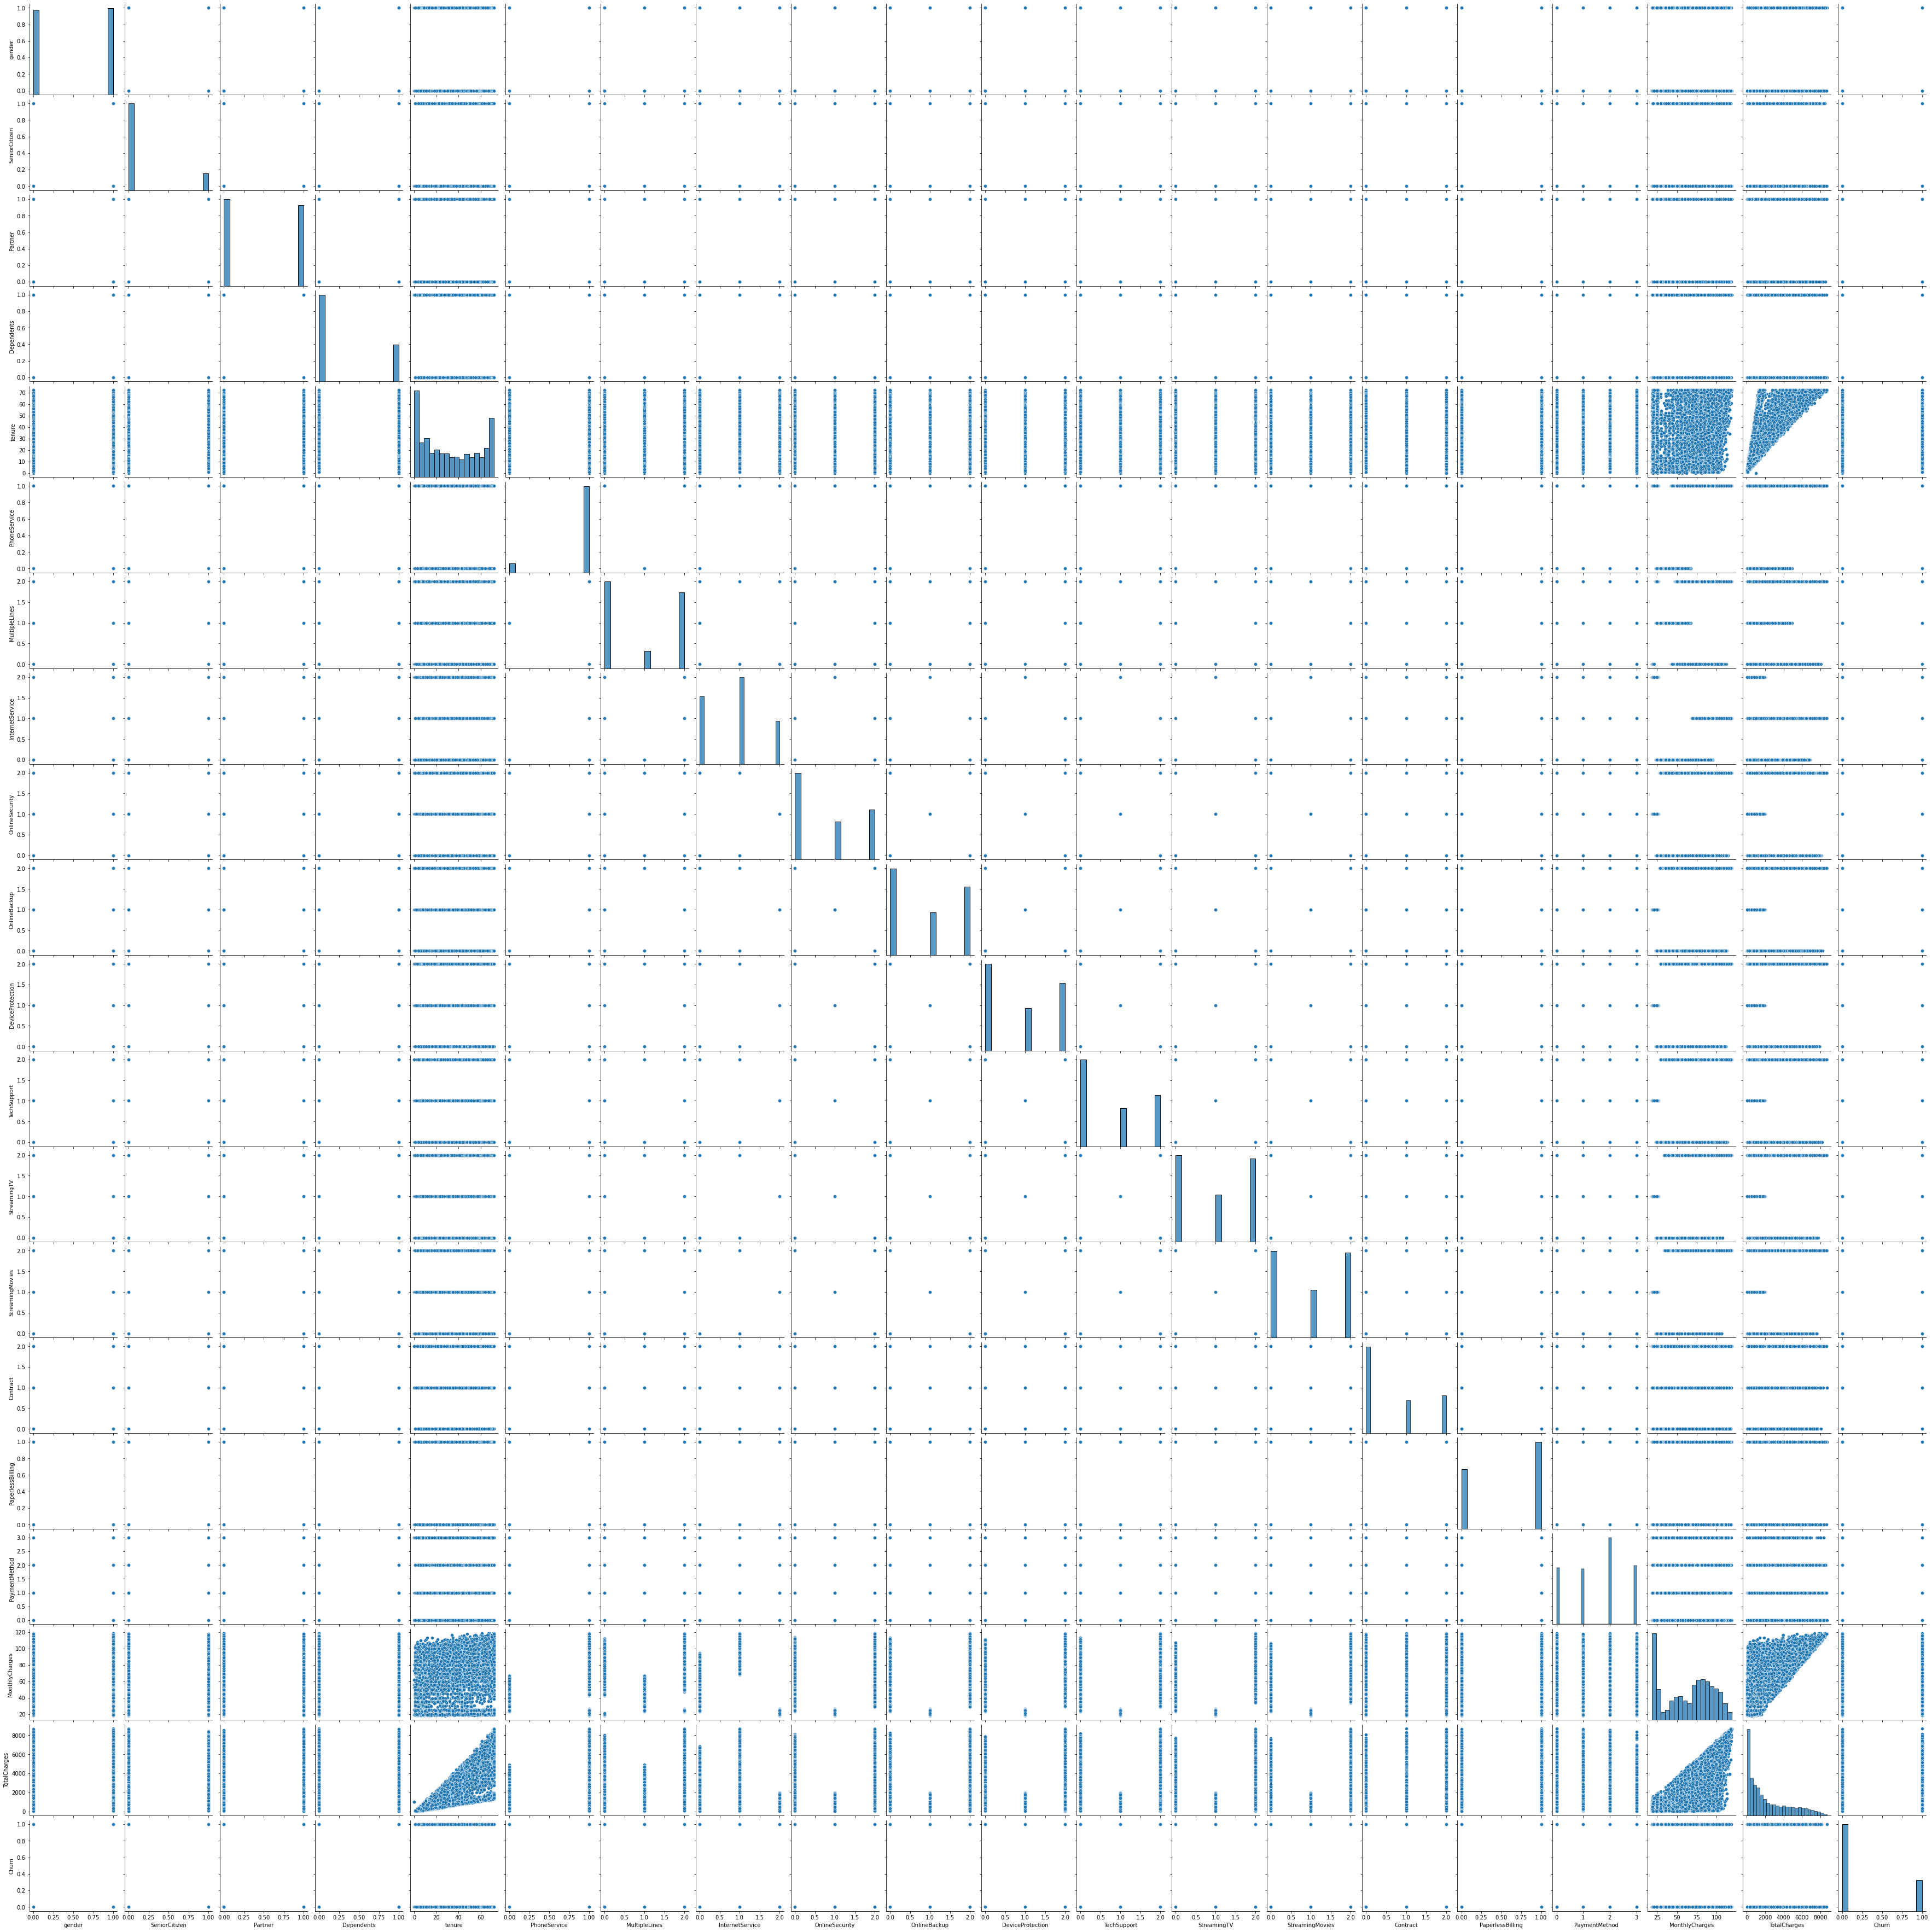

In [43]:
sns.pairplot(df.drop("customerID", axis=1))

<AxesSubplot:xlabel='Churn', ylabel='Count'>

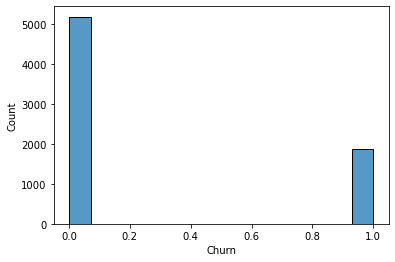

In [44]:
sns.histplot(df.Churn) 
#There are only two possible values of Churn (target variable) This refers to the fact that it is a binary class classification problem.
# 0 means with the Customer will stay and 1 means the custome will leave.

<AxesSubplot:xlabel='gender', ylabel='Count'>

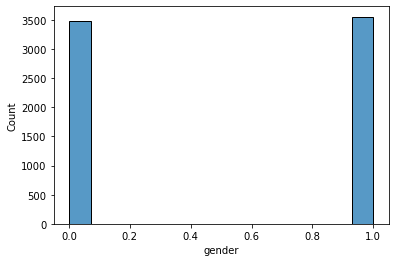

In [45]:
sns.histplot(df.gender)

In [46]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>], dtype=object)

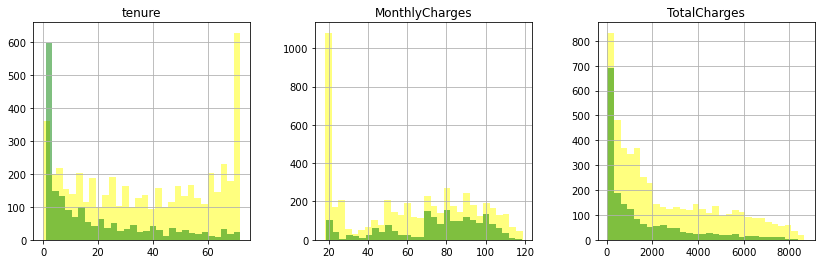

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == 0][numerical_features].hist(bins=30, color="yellow", alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=30, color="green", alpha=0.5, ax=ax)

In [48]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


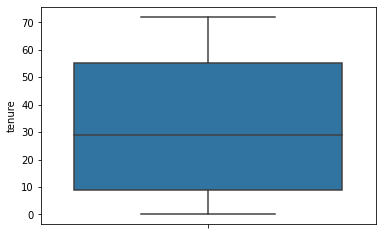

In [49]:
sns.boxplot( y=df["tenure"] ); #No outliers in the column tenure

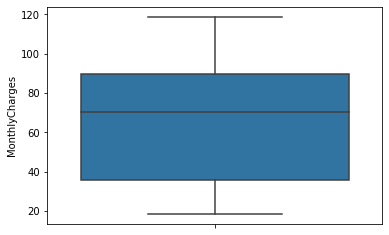

In [50]:
sns.boxplot( y=df["MonthlyCharges"] ); #No outliers in the column Monthly Charges

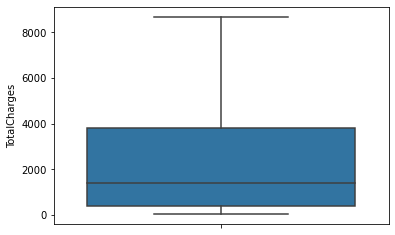

In [51]:
sns.boxplot( y=df["TotalCharges"] ); #No outliers in the column Total Charges

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

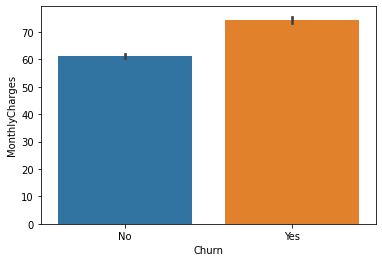

In [52]:
sns.barplot(y=churn.MonthlyCharges,x=churn.Churn)

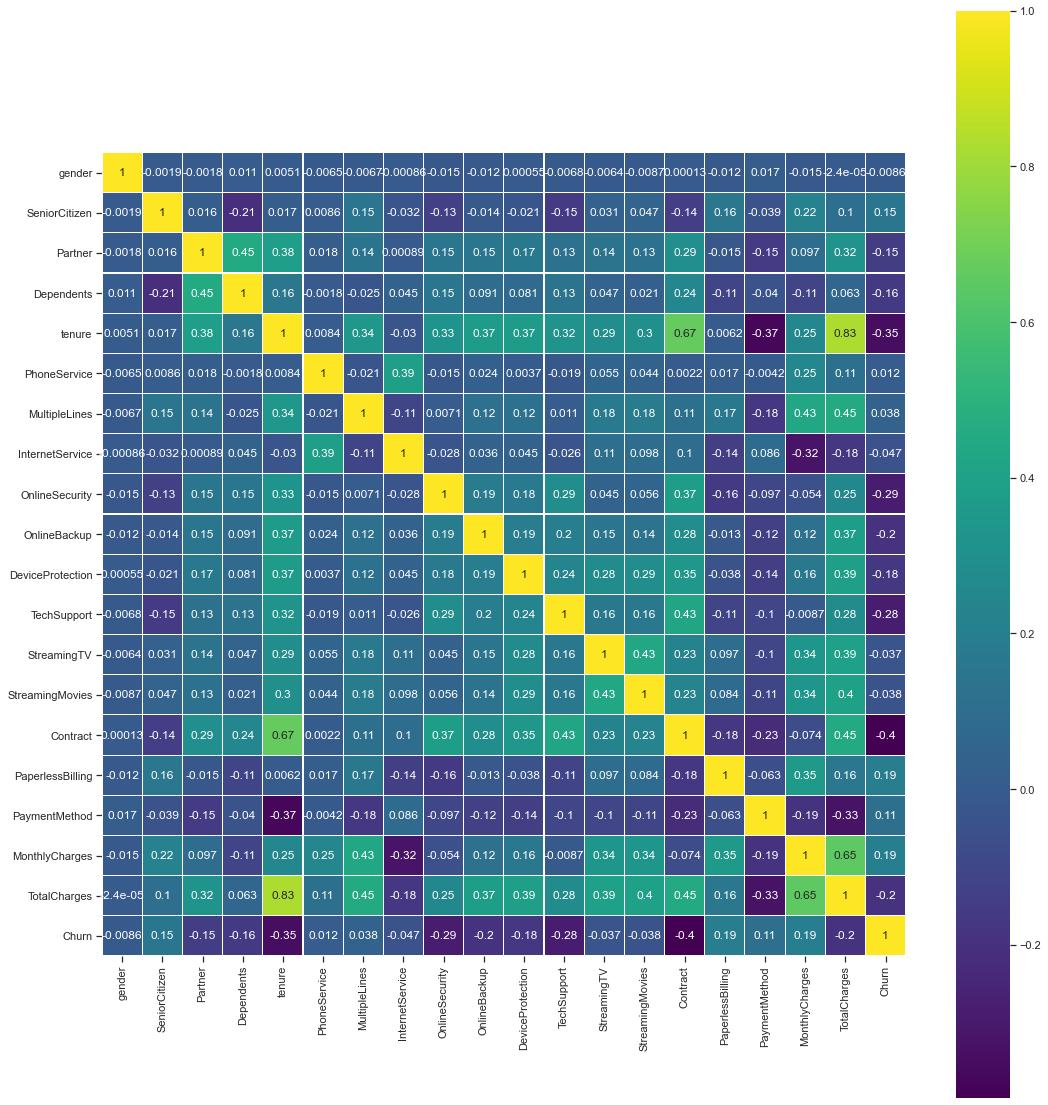

In [53]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 20))
sns.heatmap(df.drop(columns=['customerID'],axis=1).astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

### Conclusion: What all did you understand from the above charts
There is a positive correlation between the following: <br/>
        1. Monthly chanrges and Total charges <br/>
        2. Monthly charges and Tenure <br/>
    
We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

### Scaling The Dataset

In [54]:
X = df.drop(columns=['customerID','Churn'], axis=1)
y = df.Churn

In [55]:
scaled_data = StandardScaler().fit_transform(X)

In [56]:
scaled_data.shape

(7043, 19)

In [57]:
scaled_data = pd.DataFrame(data = scaled_data, columns = X.columns)

In [58]:
scaled_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.993838
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172947
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.959274
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.194467
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.940072


In [59]:
pca_= scaled_data.copy()

In [60]:
pca_.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.993838
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172947
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.959274
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.194467
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.940072


In [61]:
#pca = PCA()

In [62]:
#pca_ = pca.fit_transform(scaled_data)

In [63]:
#pca_ = pd.DataFrame(data = pca_, columns = X.columns)

In [64]:
#pca_.head()

## Split the Dataset

In [65]:
X_train, X_test, y_train, y_test = train_test_split(pca_,y, test_size=0.432, stratify=y)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 19), (3043, 19), (4000,), (3043,))

In [67]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2880,0.990532,-0.439916,-0.966622,-0.654012,-0.829521,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,1.138411,-0.828207,0.829798,-1.474052,0.504798,-0.546434
3983,0.990532,-0.439916,-0.966622,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.346444,-0.996310
5024,0.990532,-0.439916,1.034530,-0.654012,1.613701,0.327438,1.117034,1.527734,0.244242,0.106315,0.108600,0.235518,0.016526,0.008503,1.570749,-1.205113,1.334863,-1.308223,-0.213735
1886,0.990532,-0.439916,1.034530,1.529024,1.410099,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,1.570749,0.829798,-1.474052,-0.144965,0.738236
630,0.990532,2.273159,1.034530,1.529024,0.432811,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,1.396299,1.146547,1.138411,-0.828207,0.829798,-1.474052,1.528465,1.062328


In [68]:
X_train.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3451,0.990532,2.273159,1.034530,-0.654012,1.328659,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.02791,-0.925262,-1.113495,-1.121405,0.371271,0.829798,-1.474052,0.205674,1.003751
2635,0.990532,-0.439916,-0.966622,-0.654012,1.247218,0.327438,1.117034,1.527734,0.244242,0.106315,0.10860,0.235518,0.016526,0.008503,1.570749,-1.205113,1.334863,-1.313208,-0.318705
6103,0.990532,-0.439916,-0.966622,-0.654012,-0.666639,0.327438,-0.991588,1.527734,0.244242,0.106315,0.10860,0.235518,0.016526,0.008503,-0.828207,-1.205113,-0.537747,-1.496006,-0.876839
2862,0.990532,-0.439916,1.034530,-0.654012,-1.033122,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.02791,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.152497,-0.807889
4487,0.990532,-0.439916,1.034530,1.529024,-1.155283,0.327438,1.117034,1.527734,0.244242,0.106315,0.10860,0.235518,0.016526,0.008503,0.371271,-1.205113,-0.537747,-1.351430,-0.974746


## Implement Machine Learning Models

### Model 1 using  Logistic Regression

In [69]:
K = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [70]:
score_logreg = {}

In [71]:
for i in K:
    # Create and fit selector
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_train, y_train)
    selector.transform(X_train)
    # Get columns to keep and create new dataframe with those only
    cols = selector.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols]
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred_train = logreg.predict(X_train)
    score_logreg[str(i)] = accuracy_score(y_train,y_pred_train)

<AxesSubplot:>

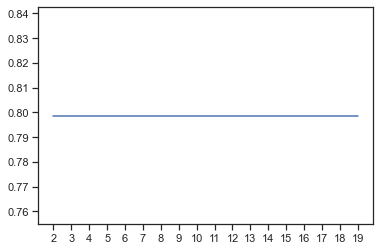

In [72]:
keys = score_logreg.keys()
values = score_logreg.values()
sns.lineplot(keys, values)
#same o all he alues o K

In [73]:
logreg = LogisticRegression()

In [74]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [75]:
logreg_y_pred = logreg.predict(X_train)

In [76]:
confusion_matrix(y_train,logreg_y_pred)

array([[2622,  317],
       [ 488,  573]], dtype=int64)

In [77]:
print(classification_report(y_train,logreg_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2939
           1       0.64      0.54      0.59      1061

    accuracy                           0.80      4000
   macro avg       0.74      0.72      0.73      4000
weighted avg       0.79      0.80      0.79      4000



### Model 2 using  Random Forest

In [78]:
rfc = RandomForestClassifier()

In [79]:
params = {'max_depth': range(1,8), 'min_samples_split':range(1,5), 'ccp_alpha':[0,0.01,0.1,0.2]}
n_folds = 5

In [80]:
grdcv =  GridSearchCV(rfc,params,cv=n_folds, scoring="accuracy")

In [81]:
grdcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 0.2],
                         'max_depth': range(1, 8),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [82]:
grdcv.best_params_

{'ccp_alpha': 0, 'max_depth': 6, 'min_samples_split': 2}

In [83]:
K = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [84]:
score_rfc = {}

In [117]:
for i in K:
    # Create and fit selector
    selector_e = SelectKBest(f_classif, k=i)
    selector_e.fit(X_train, y_train)
    selector.transform(X_train)
    # Get columns to keep and create new dataframe with those only
    cols = selector_e.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols]
    rfc = RandomForestClassifier(max_depth = 7, min_samples_split= 2)
    rfc.fit(X_train,y_train)
    y_pred_train = rfc.predict(X_train)
    score_rfc[str(i)] = accuracy_score(y_train,y_pred_train)

<AxesSubplot:>

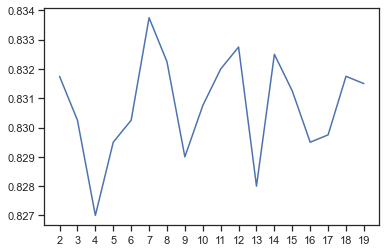

In [119]:
keys = score_rfc.keys()
values = score_rfc.values()
sns.lineplot(keys, values)
# K = 7 has the highest value, so we need to select 7 best features in order
# to get maximum accuracy for our model

In [87]:
X_train.shape, y_train.shape

((4000, 19), (4000,))

In [122]:
selector_rfc = SelectKBest(f_classif, k=7)
selector_rfc.fit(X_train, y_train)
selector_rfc.transform(X_train)
cols = selector_rfc.get_support(indices=True)
features_df_new_rfc = X_train.iloc[:,cols]

In [123]:
rfc_model = RandomForestClassifier(max_depth = 7, min_samples_split= 2)

In [124]:
rfc_model.fit(features_df_new,y_train)

RandomForestClassifier(max_depth=7)

In [125]:
rfc_model_y_pred = rfc_model.predict(features_df_new_rfc)

In [126]:
confusion_matrix(y_train,rfc_model_y_pred)

array([[2715,  224],
       [ 479,  582]], dtype=int64)

In [127]:
print(classification_report(y_train,rfc_model_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2939
           1       0.72      0.55      0.62      1061

    accuracy                           0.82      4000
   macro avg       0.79      0.74      0.75      4000
weighted avg       0.82      0.82      0.82      4000



### Model 3 using AdaBoostClassifier

In [94]:
svc = SVC(probability=True,kernel='linear')

In [95]:
#abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=0.01,random_state=32)

In [96]:
K = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [97]:
adbc = {}

In [98]:
for i in K:
    # Create and fit selector
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_train, y_train)
    selector.transform(X_train)
    # Get columns to keep and create new dataframe with those only
    cols = selector.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols]
    abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=0.01,random_state=32)
    abc.fit(X_train,y_train)
    y_pred_train = abc.predict(X_train)
    adbc[str(i)] = accuracy_score(y_train,y_pred_train)

<AxesSubplot:>

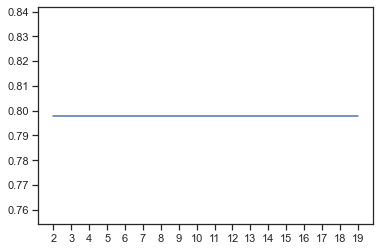

In [99]:
keys = adbc.keys()
values = adbc.values()
sns.lineplot(keys, values)
# all the K values have the same accuracy level, hecne we can use any of the values as K

In [100]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)
selector.transform(X_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]

In [101]:
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=0.01,random_state=32)

In [102]:
abc.fit(features_df_new,y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.01, random_state=32)

In [103]:
abc_model_y_pred = abc.predict(features_df_new)

In [104]:
confusion_matrix(y_train,abc_model_y_pred)

array([[2643,  296],
       [ 570,  491]], dtype=int64)

In [105]:
print(classification_report(y_train,abc_model_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2939
           1       0.62      0.46      0.53      1061

    accuracy                           0.78      4000
   macro avg       0.72      0.68      0.70      4000
weighted avg       0.77      0.78      0.77      4000



### Model Evaluation

In [130]:
selector_rfc.transform(X_test)
cols = selector_rfc.get_support(indices=True)
features_df_new_rfc_test = X_test.iloc[:,cols]

In [132]:
rfc_model_y_pred_test = rfc_model.predict(features_df_new_rfc_test)

In [133]:
confusion_matrix(y_test,rfc_model_y_pred_test)

array([[2019,  216],
       [ 364,  444]], dtype=int64)

In [134]:
print(classification_report(y_test,rfc_model_y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2235
           1       0.67      0.55      0.60       808

    accuracy                           0.81      3043
   macro avg       0.76      0.73      0.74      3043
weighted avg       0.80      0.81      0.80      3043



In [135]:
features_df_new_rfc_test.columns

Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

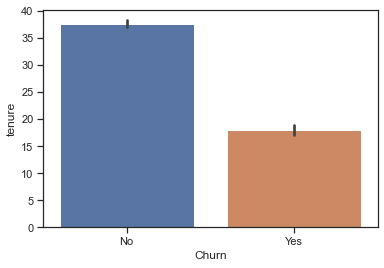

In [139]:
sns.barplot(y=churn.tenure, x=churn.Churn)
# The more the Tenure, less is the Customer Churn rate

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

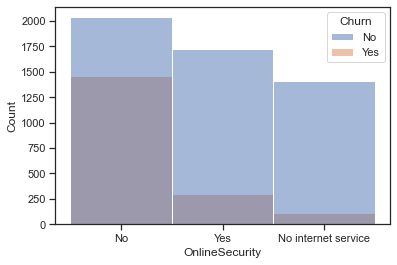

In [146]:
sns.histplot(x=churn.OnlineSecurity, hue=churn.Churn)
#When a person is having have Internet services, they should be offered Online security,
#which will help in reducing the Customer Churn rate.

<AxesSubplot:xlabel='OnlineBackup', ylabel='Count'>

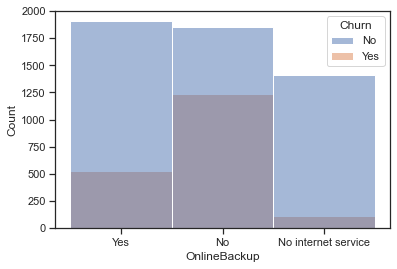

In [147]:
sns.histplot(x=churn.OnlineBackup, hue=churn.Churn)
#People having Internet Services should be offered  to take the Online backups.

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

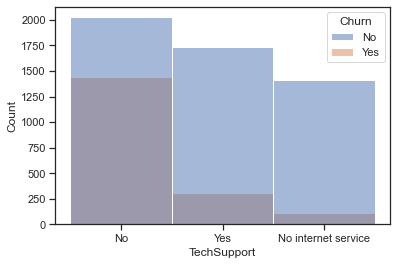

In [149]:
sns.histplot(x=churn.TechSupport, hue=churn.Churn)
#Company should ensure to provide proper TechSupport to reduce the Customer Churn rate
#and satisfy the customer needs and enhance there complaint management system

<AxesSubplot:xlabel='Contract', ylabel='Count'>

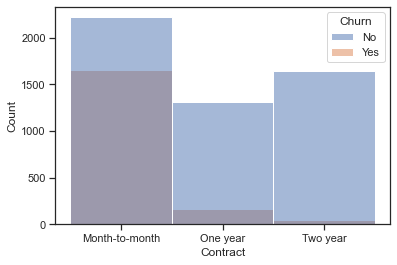

In [150]:
sns.histplot(x=churn.Contract, hue=churn.Churn)
#People with longer Contract plan of their services tend to stay longer with the company

### Final Conclusions

We selected the  variables to be included in the model by using SelectKBest alogorithm and ran it on different K values for
the features in order to extract the best number of features which would given the highest accuracy for the model.

#### Performance of the model (Random Forest Model):
1. The calibration(train) accuracy of the model is  0.82
    - The precision of the decision that the Customer would not be leaving is 0.85
    - The precision of the decision that the Customer would be leaving is 0.62         
2. The validation(test) accuracy of the model is  0.81
    - The precision of the decision that the Customer would not be leaving is 0.85
    - The precision of the decision that the Customer would be leaving is 0.67<br/><br/>
Hence, Our model is neither underfitting nor Overfitting.

The key factors that predict customer churn are as follows:<br/>
1. tenure
2. OnlineSecurity
3. OnlineBackup
4. TechSupport
5. Contract 
6. PaperlessBilling
7. MonthlyCharges

Offers that should be made to  encourage customers to retain them with  the company should be as follows:<br/>
1. Offer the customers to increase the tenure
2. If Customer is having Internet services, they should be offered complementary Online security and online backup facilities
3. Ensure the Tech Support to be provided on time and focus on cutomer needs and facilitate them timely
4. People with longer Contract plan of their services tend to stay longer with the company, ensure to 
   offer people longer contract plans with slightly low charges to make them stay.


If these actions are implemented, we can collect the latest Customer Churn data(post the implementation of these changes)
and compare the same with historic data in order to confirm that verify that the suggested changes 
has reduced the Customer Churn rate.